In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

Image label: tensor([3])
Image shape: torch.Size([1, 1, 28, 28])


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


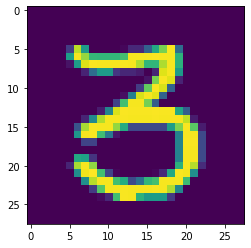

In [2]:
trainset = datasets.MNIST('Datasets', download=True, train=True, transform=transforms.ToTensor())
testset = datasets.MNIST('Datasets', download=True, train=False, transform=transforms.ToTensor())

trainloader = DataLoader(trainset, shuffle=True)
testloader = DataLoader(testset, shuffle=True)

image, label = iter(trainloader).next()
print(f"Image label: {label}")
print(f"Image shape: {image.shape}")
plt.imshow(image.reshape(28, 28))

In [3]:
print(f"Train setlength: {len(trainset)}")
print(f"Test setlength: {len(testset)}")
print(f"Ravel image size: {28*28}")

Train setlength: 60000
Test setlength: 10000
Ravel image size: 784


In [4]:
import torch.nn as nn

# nn.Module
class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)
        
    def forward(self, x):
        y_hat = self.lin(x)
        return y_hat
    
model = MNIST_Logistic_Regression()
x_rand = torch.rand(1, 784)
y = model(x_rand)

#model = nn.Linear(784, 10)
#x_rand = torch.rand(1, 784)
#y = model(x_rand)

print(f"The model: {model}")
print(f"Parameters: {list(model.parameters())}")
print(f"Output shape: {y.shape}")

The model: MNIST_Logistic_Regression(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)
Parameters: [Parameter containing:
tensor([[ 0.0054,  0.0100, -0.0189,  ...,  0.0076,  0.0102,  0.0186],
        [ 0.0224,  0.0185,  0.0310,  ...,  0.0124,  0.0020, -0.0093],
        [-0.0106,  0.0314,  0.0300,  ...,  0.0074,  0.0268,  0.0276],
        ...,
        [-0.0122, -0.0184, -0.0128,  ...,  0.0024, -0.0034,  0.0285],
        [ 0.0245, -0.0304,  0.0056,  ..., -0.0168, -0.0323,  0.0202],
        [-0.0016, -0.0295, -0.0013,  ..., -0.0178,  0.0033,  0.0052]],
       requires_grad=True), Parameter containing:
tensor([ 0.0125,  0.0105, -0.0106,  0.0039,  0.0321, -0.0027,  0.0326, -0.0250,
         0.0041, -0.0239], requires_grad=True)]
Output shape: torch.Size([1, 10])


In [5]:
# pip install tqdm
from tqdm import tqdm

model = MNIST_Logistic_Regression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) #learning rate

correct = 0
total_train = len(trainset)

for image, label in tqdm(trainloader): #TQDM
    optimizer.zero_grad() # Очищает значения градиентов параметров
    x = image.view(1, -1)
    y = model(x) #y.shape = (1, 10)
    
    predictions = torch.argmax(y, dim=1)
    correct += torch.sum((predictions == label).float())
    
    loss = criterion(y, label)    
    loss.backward()
    optimizer.step()
print(f"Train set accuracy: {(correct/total_train):.4}")

correct = 0 
total_test = len(testset)
with torch.no_grad():
    for image, label in tqdm(testloader):
        x = image.view(-1, 28*28)
        y = model(x)
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == label).float())
print(f"\nTest set accuracy: {(correct/total_test):.4}")

100%|███████████████████████████████████████████████████████████████████████████████████| 60000/60000 [01:33<00:00, 642.35it/s]


Train set accuracy: 0.8688


100%|██████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1499.96it/s]


Test set accuracy: 0.9023


In [6]:
class MNIST_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin_1 = nn.Linear(784, 256)
        self.lin_2 = nn.Linear(256, 64)
        self.lin_3 = nn.Linear(64, 10)
        
    def forward(self, x):
        a1 = self.lin_1(x)
        a2 = self.lin_2(a1)
        y_hat = self.lin_3(a2)
        return y_hat
    
model = MNIST_NN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

correct = 0
total_train = len(trainset)

for image, label in tqdm(trainloader): #TQDM
    optimizer.zero_grad() # Очищает значения градиентов параметров
    x = image.view(1, -1)
    y = model(x) #y.shape = (1, 10)
    
    predictions = torch.argmax(y, dim=1)
    correct += torch.sum((predictions == label).float())
    
    loss = criterion(y, label)    
    loss.backward()
    optimizer.step()
print(f"Train set accuracy: {(correct/total_train):.4}")

correct = 0 
total_test = len(testset)
with torch.no_grad():
    for image, label in tqdm(testloader):
        x = image.view(-1, 28*28)
        y = model(x)
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == label).float())
print(f"\nTest set accuracy: {(correct/total_test):.4}")

100%|███████████████████████████████████████████████████████████████████████████████████| 60000/60000 [05:21<00:00, 186.73it/s]


Train set accuracy: 0.8685


100%|██████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1078.00it/s]


Test set accuracy: 0.8831
